In [29]:
install.packages('car')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [30]:
library("car")
data("Anscombe")
head(Anscombe)
?Anscombe

Xc = scale(Anscombe, center=TRUE, scale=TRUE)
str(Xc)

data_jags = as.list(data.frame(Xc))

,education,income,young,urban
,<int>,<int>,<dbl>,<int>
ME,189,2824,350.7,508
NH,169,3259,345.9,564
VT,230,3072,348.5,322
MA,168,3835,335.3,846
RI,180,3549,327.1,871
CT,193,4256,341.0,774


 num [1:51, 1:4] -0.157 -0.588 0.725 -0.609 -0.351 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:51] "ME" "NH" "VT" "MA" ...
  ..$ : chr [1:4] "education" "income" "young" "urban"
 - attr(*, "scaled:center")= Named num [1:4] 196 3225 359 665
  ..- attr(*, "names")= chr [1:4] "education" "income" "young" "urban"
 - attr(*, "scaled:scale")= Named num [1:4] 46.5 560 24 151.3
  ..- attr(*, "names")= chr [1:4] "education" "income" "young" "urban"


In [31]:
library("rjags")

mod_string = " model {
    for (i in 1:length(education)) {
        education[i] ~ dnorm(mu[i], prec)
        mu[i] = b0 + b[1]*income[i] + b[2]*young[i] + b[3]*urban[i]
    }
    
    b0 ~ ddexp(0.0, 1.0)
    for (i in 1:3) {
        b[i] ~ ddexp(0.0, 1.0)
    }
    
    prec ~ dgamma(1.0/2.0, 1.0/2.0)
    	## Initial guess of variance based on overall
    	## variance of education variable. Uses low prior
    	## effective sample size. Technically, this is not
    	## a true 'prior', but it is not very informative.
    sig2 = 1.0 / prec
    sig = sqrt(sig2)
} "
params = c("b0", "b", "sig", "sig2")

data_jags = as.list(Anscombe)

In [32]:
mod1 = jags.model(textConnection(mod_string), data=data_jags, n.chains=3)
update(mod1, 1000) # burn-in

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 51
   Unobserved stochastic nodes: 5
   Total graph size: 417

Initializing model



In [33]:
mod1_sim = coda.samples(model=mod1,
                        variable.names=params,
                        n.iter=5000)
mod1_csim = do.call(rbind, mod1_sim) # combine multiple chains

In [27]:
dic.samples(mod1, n.iter=1e5)

Mean deviance:  497.4 
penalty 4.186 
Penalized deviance: 501.6 

In [34]:
summary(mod1_sim)


Iterations = 2001:7000
Thinning interval = 1 
Number of chains = 3 
Sample size per chain = 5000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

           Mean        SD  Naive SE Time-series SE
b[1]    0.06982 9.774e-03 0.0000798      0.0008752
b[2]    0.14182 6.033e-02 0.0004926      0.0038802
b[3]   -0.11863 3.644e-02 0.0002976      0.0026061
b0     -0.08508 1.385e+00 0.0113107      0.0184857
sig    31.47834 3.230e+00 0.0263737      0.0325906
sig2 1001.31902 2.091e+02 1.7076233      2.1206572

2. Quantiles for each variable:

          2.5%       25%       50%        75%      97.5%
b[1]   0.05221   0.06293   0.06926    0.07646    0.08974
b[2]   0.02089   0.10120   0.14287    0.18331    0.25639
b[3]  -0.19548  -0.14267  -0.11705   -0.09390   -0.05064
b0    -3.04948  -0.75285  -0.06124    0.60487    2.77650
sig   25.93277  29.19897  31.20839   33.47895   38.62618
sig2 672.50855 852.57985 973.96343 1120.84000 1491.98212


In [35]:
data("warpbreaks")
?warpbreaks
head(warpbreaks)

breaks,wool,tension
<dbl>,<fct>,<fct>
26,A,L
30,A,L
54,A,L
25,A,L
70,A,L
52,A,L


'data.frame':	54 obs. of  3 variables:
 $ breaks : num  26 30 54 25 70 52 51 26 67 18 ...
 $ wool   : Factor w/ 2 levels "A","B": 1 1 1 1 1 1 1 1 1 1 ...
 $ tension: Factor w/ 3 levels "L","M","H": 1 1 1 1 1 1 1 1 1 2 ...
Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 54
   Unobserved stochastic nodes: 12
   Total graph size: 192

Initializing model



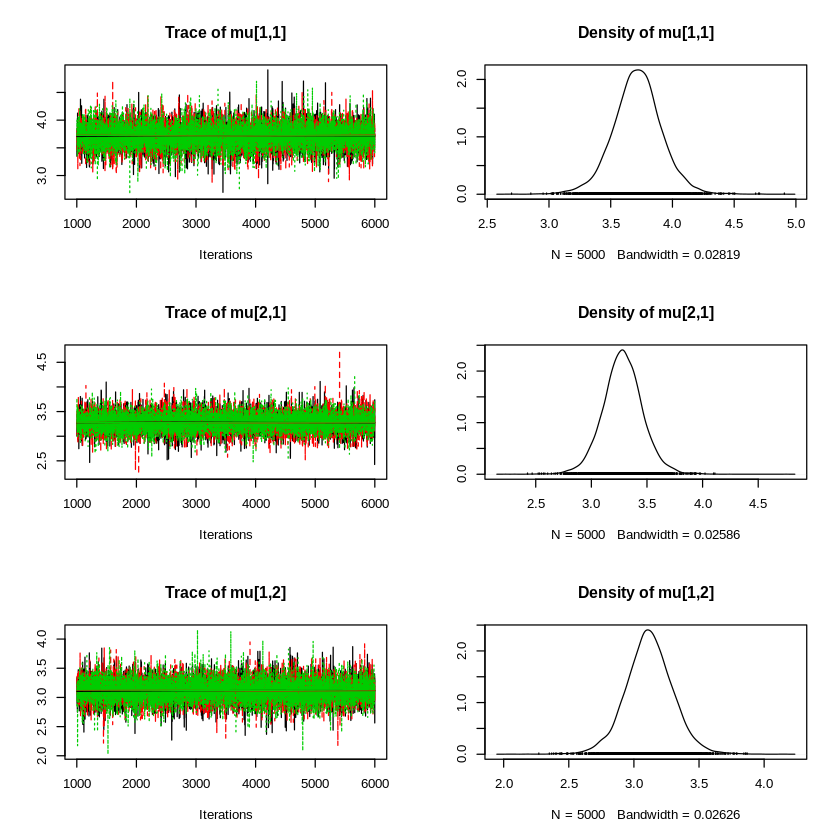

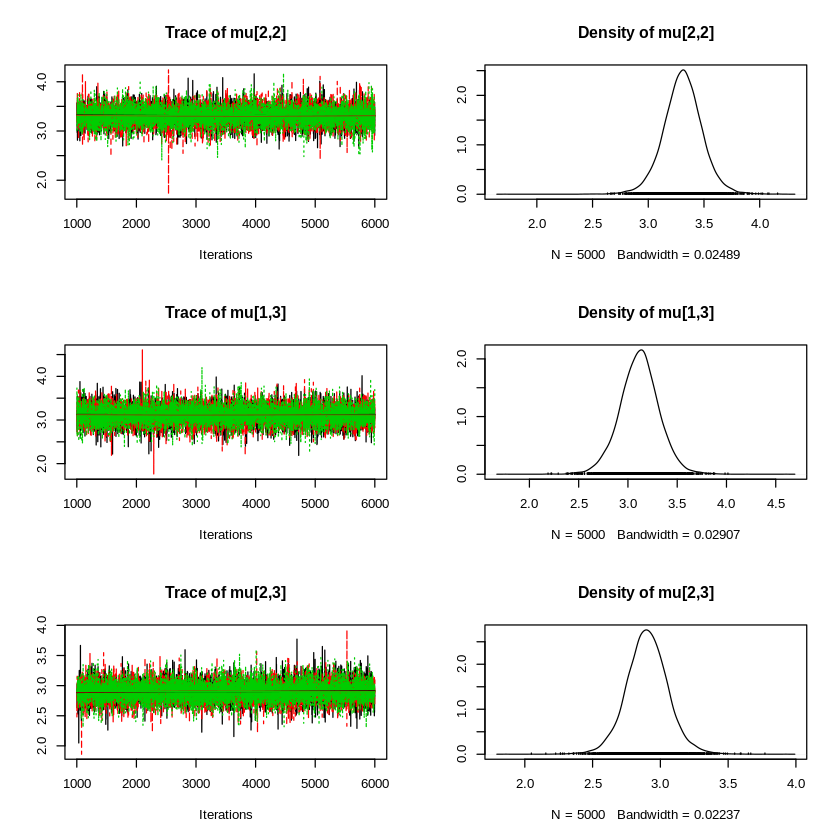

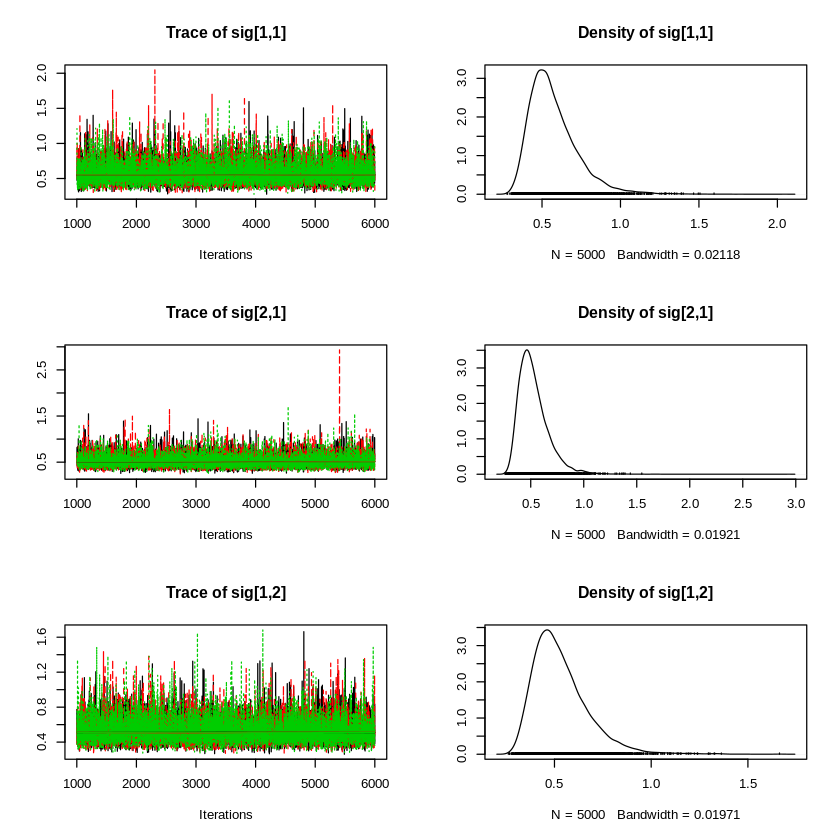

Potential scale reduction factors:

         Point est. Upper C.I.
mu[1,1]           1          1
mu[2,1]           1          1
mu[1,2]           1          1
mu[2,2]           1          1
mu[1,3]           1          1
mu[2,3]           1          1
sig[1,1]          1          1
sig[2,1]          1          1
sig[1,2]          1          1
sig[2,2]          1          1
sig[1,3]          1          1
sig[2,3]          1          1

Multivariate psrf

1

,"mu[1,1]","mu[2,1]","mu[1,2]","mu[2,2]","mu[1,3]","mu[2,3]","sig[1,1]","sig[2,1]","sig[1,2]","sig[2,2]","sig[1,3]","sig[2,3]"
Lag 0,1.000000000,1.000000000,1.000000000,1.000000e+00,1.000000000,1.000000000,1.000000000,1.000000000,1.000000000,1.0000000000,1.000000000,1.000000000
Lag 1,-0.003747905,0.006878469,0.001816505,-2.675134e-02,0.002698011,-0.013244362,0.128147919,0.105394884,0.107742767,0.1253087473,0.110812043,0.128444340
Lag 5,0.015875797,-0.005742676,-0.014510149,-6.344429e-05,-0.005129679,-0.006465656,0.002522889,0.005273361,-0.005404234,0.0003511689,-0.002607757,0.004015585
Lag 10,-0.029462662,-0.002687235,-0.008004584,1.416705e-02,-0.007744613,0.008678371,0.003096725,0.008150844,0.004041739,-0.0102052819,0.000123218,0.009389917
Lag 50,0.002195506,-0.004317475,-0.008694442,-2.576854e-03,0.008556668,0.019204398,-0.005956229,0.002870071,-0.008984892,0.0089588084,-0.001970160,0.002463997


mu[1,1]  mu[2,1]  mu[1,2]  mu[2,2]  mu[1,3]  mu[2,3] sig[1,1] sig[2,1] 
15819.15 14787.78 15041.56 15385.30 14958.66 15000.00 11589.98 11882.41 
sig[1,2] sig[2,2] sig[1,3] sig[2,3] 
12083.27 11665.67 12008.80 11352.44

[[1]]

Quantile (q) = 0.025
Accuracy (r) = +/- 0.005
Probability (s) = 0.95 
                                                
          Burn-in  Total Lower bound  Dependence
          (M)      (N)   (Nmin)       factor (I)
 mu[1,1]  3        4062  3746         1.080     
 mu[2,1]  2        3803  3746         1.020     
 mu[1,2]  2        3995  3746         1.070     
 mu[2,2]  2        3741  3746         0.999     
 mu[1,3]  2        3930  3746         1.050     
 mu[2,3]  3        4198  3746         1.120     
 sig[1,1] 2        3866  3746         1.030     
 sig[2,1] 2        3741  3746         0.999     
 sig[1,2] 2        3620  3746         0.966     
 sig[2,2] 2        3741  3746         0.999     
 sig[1,3] 2        3741  3746         0.999     
 sig[2,3] 2        3741  3746         0.999     


[[2]]

Quantile (q) = 0.025
Accuracy (r) = +/- 0.005
Probability (s) = 0.95 
                                                
          Burn-in  Total Lower bound  Dependence
          (

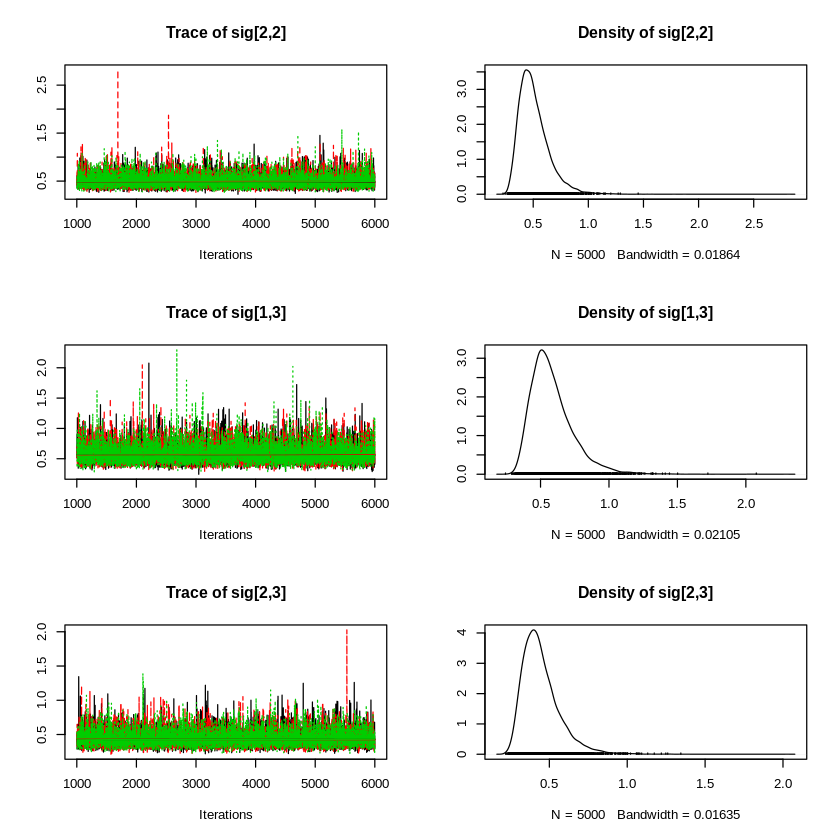

In [38]:
mod3_string = " model {
    for( i in 1:length(y)) {
        y[i] ~ dnorm(mu[woolGrp[i], tensGrp[i]], prec[woolGrp[i], tensGrp[i]])
    }
    
    for (j in 1:max(woolGrp)) {
        for (k in 1:max(tensGrp)) {
            mu[j,k] ~ dnorm(0.0, 1.0/1.0e6)
            prec[j, k] ~ dgamma(1.0/2.0, 1.0/2.0)
            sig[j, k] = sqrt(1.0 / prec[j, k])
        }
    }
} "

str(warpbreaks)

data3_jags = list(y=log(warpbreaks$breaks), woolGrp=as.numeric(warpbreaks$wool), tensGrp=as.numeric(warpbreaks$tension))

params3 = c("mu", "sig")

mod3 = jags.model(textConnection(mod3_string), data=data3_jags, n.chains=3)
update(mod3, 1e3)

mod3_sim = coda.samples(model=mod3,
                        variable.names=params3,
                        n.iter=5e3)
mod3_csim = as.mcmc(do.call(rbind, mod3_sim))

plot(mod3_sim, ask=TRUE)

## convergence diagnostics
gelman.diag(mod3_sim)
autocorr.diag(mod3_sim)
effectiveSize(mod3_sim)
raftery.diag(mod3_sim)

In [40]:
dic.samples(mod3, n.iter=1e5)

Mean deviance:  60.28 
penalty 14.58 
Penalized deviance: 74.86 